<a href="https://colab.research.google.com/github/Kim-Jeong-Ju/AI_Modeling_NLP/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Packages and Modules Importation**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding
from tensorflow.keras.utils import plot_model

# **Multi-Layer Perceptron, 다층 퍼셉트론**  


---

- Single-Layer Perceptron의 구조에서 **Hidden-Layer가 1개 이상 추가된 신경망** 구조, **FFNN**(Feed-Forward Neural Network)의 가장 기본적인 형태, FFNN이란 **입력층에서 출력층으로 오직 한 방향으로만 연산** 방향이 정해져 있음
- **RNN과 분산 표현(Distributed Representation)** 등의 새로운 개념 없이 NLP 수행 가능

## **Keras의 `texts_to_matrix()`에 대하여**  
> I. **count mode**의 경우, 문서 단어 행렬인 DTM을 생성하나 word_index의 갯수에 +1이 되어 **0번째 index가 새로 생성됨**. 실제로 0번째 index는 단 한번도 사용되지 않아 효율성이 떨어짐  
> II. **binary mode**의 경우 해당 단어의 빈도수에는 관심이 없고, **해당 단어의 존재 유무**에만 관심이 있음.  
> III. **tfidf mode**의 경우 TF-IDF 행렬을 생성함. 다만 이전의 개념과는 달리 TF가 각 단어의 빈도에 자연 로그를 씌우고 +1 한 값으로 생성됨. IDF의 경우 앞서 배운 개념의 로그에 자연 로그가 해당되며 로그 안의 분수에 +1이 추가됨 [중요X]  
> IV. **freq mode**의 경우 **각 문서에서의 각 단어 빈도수를 분자로, 각 문서에서의 모든 단어의 빈도수의 총합을 분모**로 하는 표현법

In [ ]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [ ]:
dir(tokenizer)    # Keras의 Tokenizer() 속성을 파악하기 위함

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_keras_api_names',
 '_keras_api_names_v1',
 'analyzer',
 'char_level',
 'document_count',
 'filters',
 'fit_on_sequences',
 'fit_on_texts',
 'get_config',
 'index_docs',
 'index_word',
 'lower',
 'num_words',
 'oov_token',
 'sequences_to_matrix',
 'sequences_to_texts',
 'sequences_to_texts_generator',
 'split',
 'texts_to_matrix',
 'texts_to_sequences',
 'texts_to_sequences_generator',
 'to_json',
 'word_counts',
 'word_docs',
 'word_index']

In [ ]:
print(tokenizer.word_index)    # for test
print()
print(tokenizer.index_word)    # for test

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}

{1: '바나나', 2: '먹고', 3: '싶은', 4: '사과', 5: '길고', 6: '노란', 7: '저는', 8: '과일이', 9: '좋아요'}


In [ ]:
print("========== Count mode ==========")
print(tokenizer.texts_to_matrix(texts, mode = 'count'))     # texts_to_matrix의 입력으로 texts를 넣고, 모드는 'count'
print()

print("========== Binary mode ==========")
print(tokenizer.texts_to_matrix(texts, mode = 'binary'))     # texts_to_matrix의 입력으로 texts를 넣고, 모드는 'count'
print()

print("========== TF-IDF mode ==========")
print(tokenizer.texts_to_matrix(texts, mode = 'tfidf').round(2))     # texts_to_matrix의 입력으로 texts를 넣고, 모드는 'count'
print()

print("========== Freq mode ==========")
print(tokenizer.texts_to_matrix(texts, mode = 'freq').round(2))     # texts_to_matrix의 입력으로 texts를 넣고, 모드는 'count'

========== Count mode ==========
[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]

========== Binary mode ==========
[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]

========== TF-IDF mode ==========
[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]

========== Freq mode ==========
[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


## **20개의 News Group Dataset에 대한 이해 from Scikit-Learn**

In [ ]:
newsdata = fetch_20newsgroups(subset="train")        # subset 속성으로 train을 입력하면 학습용 데이터셋만 return

dir(newsdata)
print()

print(newsdata.keys())
print()

print(newsdata.filenames)
print()

print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)
print()

print(newsdata.target)
print()

print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))
print()

print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))
print(newsdata.data[0])     # 첫번째 샘플 출력


dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

['/root/scikit_learn_data/20news_home/20news-bydate-train/rec.autos/102994'
 '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.mac.hardware/51861'
 '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.mac.hardware/51879'
 ...
 '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.ibm.pc.hardware/60695'
 '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38319'
 '/root/scikit_learn_data/20news_home/20news-bydate-train/rec.motorcycles/104440']

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

[7 4 4 ... 3 

In [ ]:
data = pd.DataFrame(newsdata.data, columns = ['email'])         # 메일 본문에 해당하는 "email" column, 정답 label에 해당하는 "target" column
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [ ]:
data.isnull().values.any()      # Null값(결측치)이 있는지 확인

False

In [ ]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))       # 중복을 제거한 value 확인
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


10    600
15    599
8     598
9     597
11    595
7     594
13    594
5     593
14    593
2     591
12    591
3     590
6     585
1     584
4     578
17    564
16    546
0     480
18    465
19    377
Name: target, dtype: int64

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377



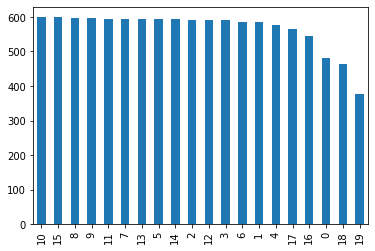

In [ ]:
print(data['target'].value_counts())                                        # DataFrame에서 정답 label의 갯수 확인 및 Visualization
print()
print(data.groupby('target').size().reset_index(name='count'))
print()

data['target'].value_counts().plot(kind='bar');

In [ ]:
train_email = data['email']
train_label = data['target']

newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
test_email = newsdata_test.data
test_label = newsdata_test.target

## **Keras의 Tokenizer를 활용한 데이터 전처리**

### **Keras를 활용한 Text Dataset 정수 인코딩 및 단어 집합화 Example**

In [ ]:
tokenizer = Tokenizer()
train_text = "The earth is an awesome place live"
sub_text = "The earth is an great place live"

tokenizer.fit_on_texts([train_text])
sequences = tokenizer.texts_to_sequences([sub_text])[0]

print("정수 인코딩 :", sequences)
print("단어 집합 :", tokenizer.word_index)
print()

pad_seq_result = pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding="pre")
print(pad_seq_result)

정수 인코딩 : [1, 2, 3, 4, 6, 7]
단어 집합 : {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}

[[1 2 3]
 [4 5 6]
 [0 7 8]]


### **Word Embedding Example**

In [ ]:
tokenized_text = [["Hope", "to", "see", "you", "soon"], ["Nice", "to", "see", "you", "again"]]
encoded_text = [[0, 1, 2, 3, 4], [5, 1, 2, 3, 6]]

vocab_size = 7
embedding_dim = 2

embedded_vector = Embedding(vocab_size, embedding_dim, input_length=5)
print(embedded_vector)

In [ ]:
vocab_size = 10000
num_classes = 20

def prepare_data(train_data, test_data, mode):                      # 데이터셋 전처리 함수
    tokenizer = Tokenizer(num_words=vocab_size)                     # 사전에 정의한 vocab_size만큼의 단어만 사용
    tokenizer.fit_on_texts(train_data)

    X_train = tokenizer.texts_to_matrix(train_data, mode=mode)      # sample size * vocab_size 만큼의 행렬 생성
    X_test = tokenizer.texts_to_matrix(test_data, mode=mode)

    return X_train, X_test, tokenizer.index_word

X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary')    # binary 모드로 변환
y_train = to_categorical(train_label, num_classes)                                  # One-Hot Encoding
y_test = to_categorical(test_label, num_classes)

print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))
print()

print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))             # 행렬의 0-index는 사용하지 않으므로 총 9999개의 단어가 표현됨
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))       # 빈도수 상위 1위와 9999위 단어 확인

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


## **MLP를 사용한 Text Classification**

In [ ]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):                     # Text Classification을 위한 MLP Model 설계
    mlp_model = Sequential()

    mlp_model.add(Dense(256, input_shape=(vocab_size,), activation="relu"))
    mlp_model.add(Dropout(0.5))             # Over-Fitting 방지를 위한 Drop-Out 기법 사용

    mlp_model.add(Dense(128, activation="relu"))
    mlp_model.add(Dropout(0.5))

    mlp_model.add(Dense(num_classes, activation="softmax"))

    mlp_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    mlp_model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)

    score = mlp_model.evaluate(X_test, y_test, batch_size=128, verbose=1)       # score[0] = loss, score[1] = accuracy

    return score[1]

In [ ]:
mlp_model = Sequential()

mlp_model.add(Dense(256, input_shape=(vocab_size,), activation='relu'))
mlp_model.add(Dropout(0.5))

mlp_model.add(Dense(128, activation='relu'))
mlp_model.add(Dropout(0.5))

mlp_model.add(Dense(num_classes, activation='softmax'))

mlp_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

mlp_model.summary()         # Model의 Architecture 파악

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560256   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 20)                2580      
                                                                 
Total params: 2,595,732
Trainable params: 2,595,732
Non-trainable params: 0
_________________________________________________________________


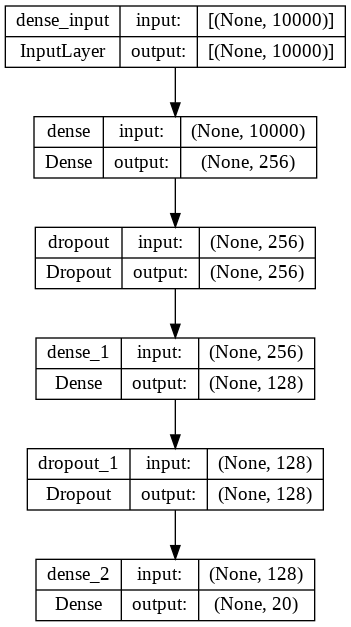

In [ ]:
plot_model(mlp_model, show_shapes=True)     # TensorFlow Keras Utils의 plot_model 함수를 통해 모델 구조 Visualization

In [ ]:
modes = ['binary', 'count', 'tfidf', 'freq']                            # 4개의 모드를 리스트에 저장

for mode in modes:                                                      # 4개의 모드에 대해서 각각 아래의 작업을 반복
    X_train, X_test, _ = prepare_data(train_email, test_email, mode)    # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test)          # 모델을 훈련하고 평가
    print(f"========== {mode} mode의 테스트 정확도 = {score} ==========")
    print("\n")

Epoch 1/5
80/80 [==============================] - 1s 9ms/step - loss: 2.2956 - accuracy: 0.3423 - val_loss: 0.9715 - val_accuracy: 0.8392
Epoch 2/5
80/80 [==============================] - 0s 6ms/step - loss: 0.8623 - accuracy: 0.7661 - val_loss: 0.4526 - val_accuracy: 0.8852
Epoch 3/5
80/80 [==============================] - 1s 6ms/step - loss: 0.4328 - accuracy: 0.8853 - val_loss: 0.3406 - val_accuracy: 0.9019
Epoch 4/5
80/80 [==============================] - 1s 6ms/step - loss: 0.2655 - accuracy: 0.9333 - val_loss: 0.3119 - val_accuracy: 0.9099
Epoch 5/5
59/59 [==============================] - 0s 5ms/step - loss: 0.6483 - accuracy: 0.8313
========== binary mode의 테스트 정확도 = 0.8312532901763916 ==========


Epoch 1/5
80/80 [==============================] - 1s 9ms/step - loss: 2.7704 - accuracy: 0.2517 - val_loss: 1.5173 - val_accuracy: 0.7279
Epoch 2/5
80/80 [==============================] - 1s 7ms/step - loss: 1.3646 - accuracy: 0.6426 - val_loss: 0.7128 - val_accuracy: 0.8454
Epo